---
# Librerie necessarie
---

In [1]:
!pip install TikTokApi --upgrade
!pip install webdriver_manager
!pip install emot
!pip install deep-translator
!pip install transformers
!pip install emosent-py
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from TikTokApi import TikTokApi
import pandas as pd
#Importing libraries
import re
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from deep_translator import GoogleTranslator
import transformers
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3';
from sklearn.model_selection import train_test_split
import sklearn.base
import sklearn.preprocessing
import string
import sklearn;
import sklearn.feature_extraction;
import sklearn.feature_extraction.text;
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import scipy
from google.colab import drive
import transformers
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer,RobertaTokenizerFast, RobertaForSequenceClassification
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from emosent import get_emoji_sentiment_rank
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from collections import defaultdict
from pathlib import Path
import random
drive.mount('/content/drive')
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.set_palette(sns.color_palette(["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]))
rcParams['figure.figsize'] = 12, 8
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


device(type='cuda', index=0)

Salvataggio file di testo contenente le versioni dei package utilizzati (ossia, requirements.txt).

In [2]:
e=False
try:
    f = open('/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/requirements.txt')
    e=True
    f.close()
except IOError:
    print("File not accessible")
print("il file.txt delle versioni esiste?",e)
if e==False:
  !pip freeze > /content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/requirements.txt
  print('File creato')

File not accessible
il file.txt delle versioni esiste? False
File creato


---
# TikTok API e creazione del dataset di utilizzo
---
## Utilizzo della libreria TiktokApi per estrapolare le informazioni dalla piattaforma Tiktok.

Per ottenere il mobile token: basta eseguire i seguenti passaggi:    

1.   Accedere con un account profilo su tiktok: https://www.tiktok.com/

2.   Cliccare sul lucchetto:    
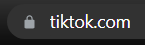

3. Cliccare su Cookie:    
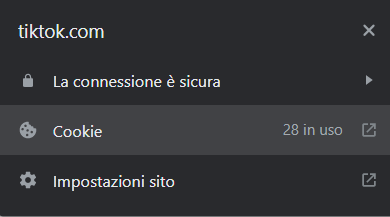

4. Clicca su www.tiktok.com--> poi su Cookie--> infine su s_v_web_id
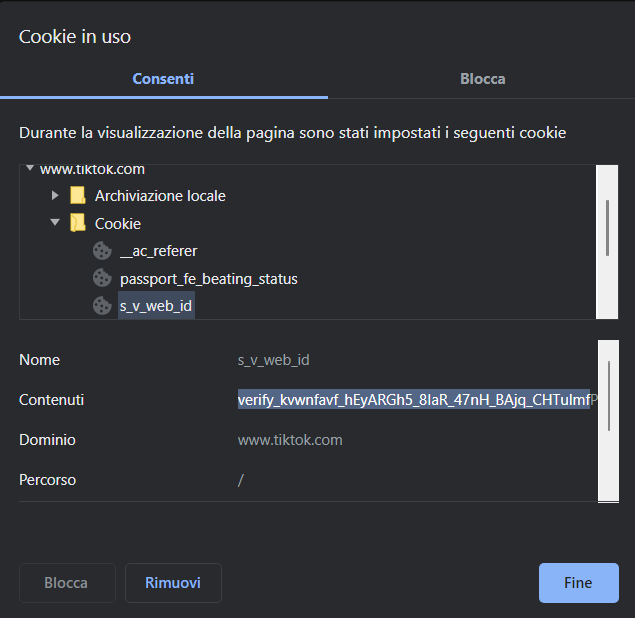

5. Copia tutto il contenuto in 'contenuto' e si avrà il token:     
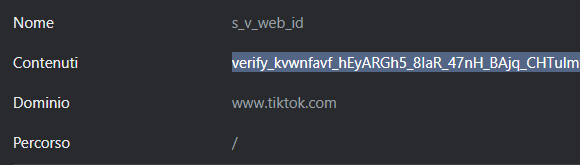 

In [3]:
#token generato da un profilo tiktok creato
my="verify_ksq6dlqh_wyMbdkgM_Prug_4YDR_9DGO_PtzCYmWKpQk8"
#my='verify_kun7zcyx_mHpeSf8S_rGT6_4WWs_8UV9_Y63jUOwDIjd9'

while True:
  try:
      api = TikTokApi.get_instance(custom_verifyFp=my,use_endpoints=True)
  except :
      continue
  break

def costruisci_dataframe(x):
  ris=x[0]
  print(ris['uniqueId'],"partito1")
  us1=pd.DataFrame.from_dict(ris['seoProps']['metaParams'],orient='index').transpose()
  result_list = [v for k,v in ris['userInfo'].items()]
  us2=pd.DataFrame.from_dict(result_list[0],orient='index').transpose()
  us3=pd.DataFrame.from_dict(result_list[1],orient='index').transpose()
  us4=pd.DataFrame.from_dict(ris['items'][0],orient='index').transpose()
  us4=us4.rename(columns={'id':'Videoid','desc':'desc_video','createTime':'createTimeVideo'})
  us_info=pd.concat([us1,us2,us3,us4],axis=1)
  print(ris['uniqueId'],"finito1")
  for i in range (len(ris['items'])):
    if i!=0:
      print(ris['uniqueId'],"partito1")
      us1=pd.DataFrame.from_dict(ris['seoProps']['metaParams'],orient='index').transpose()
      result_list = [v for k,v in ris['userInfo'].items()]
      us2=pd.DataFrame.from_dict(result_list[0],orient='index').transpose()
      us3=pd.DataFrame.from_dict(result_list[1],orient='index').transpose()
      us4=pd.DataFrame.from_dict(ris['items'][i],orient='index').transpose()
      us4=us4.rename(columns={'id':'Videoid','desc':'desc_video','createTime':'createTimeVideo'})
      us=pd.concat([us1,us2,us3,us4],axis=1)
      print(ris['uniqueId'],"finito1")
      us_info=us_info.append(us)
  us_info.index=[(lambda x: x)(x) for x in range(len(ris['items']))]
  info_df=us_info[['title', 'keywords', 'description', 'canonicalHref', 'id', 'uniqueId',
        'nickname', 'avatarLarger', 'signature', 'createTime', 'verified',
        'secUid', 'privateAccount', 'followerCount', 'followingCount', 'heart',
        'videoCount', 'Videoid', 'desc_video', 'createTimeVideo', 'video', 'author', 'music',
        'stats', 'effectStickers']]
  for i in range (len(x)):
    ris=x[i]
    print(ris['uniqueId'],"partito2")
    us1=pd.DataFrame.from_dict(ris['seoProps']['metaParams'],orient='index').transpose()
    result_list = [v for k,v in ris['userInfo'].items()]
    us2=pd.DataFrame.from_dict(result_list[0],orient='index').transpose()
    us3=pd.DataFrame.from_dict(result_list[1],orient='index').transpose()
    us4=pd.DataFrame.from_dict(ris['items'][0],orient='index').transpose()
    us4=us4.rename(columns={'id':'Videoid','desc':'desc_video','createTime':'createTimeVideo'})
    us_info=pd.concat([us1,us2,us3,us4],axis=1)
    print(ris['uniqueId'],"finito2")
    for i in range (len(ris['items'])):
      if i!=0:
        print(ris['uniqueId'],"partito2")
        us1=pd.DataFrame.from_dict(ris['seoProps']['metaParams'],orient='index').transpose()
        result_list = [v for k,v in ris['userInfo'].items()]
        us2=pd.DataFrame.from_dict(result_list[0],orient='index').transpose()
        us3=pd.DataFrame.from_dict(result_list[1],orient='index').transpose()
        us4=pd.DataFrame.from_dict(ris['items'][i],orient='index').transpose()
        us4=us4.rename(columns={'id':'Videoid','desc':'desc_video','createTime':'createTimeVideo'})
        us=pd.concat([us1,us2,us3,us4],axis=1)
        print(ris['uniqueId'],"finito2")
        us_info=us_info.append(us)
    us_info.index=[(lambda x: x)(x) for x in range(len(ris['items']))]
    df=us_info[['title', 'keywords', 'description', 'canonicalHref', 'id', 'uniqueId',
        'nickname', 'avatarLarger', 'signature', 'createTime', 'verified',
        'secUid', 'privateAccount', 'followerCount', 'followingCount', 'heart',
        'videoCount', 'Videoid', 'desc_video', 'createTimeVideo', 'video', 'author', 'music',
        'stats', 'effectStickers']]
    info_df=pd.concat([info_df,df])
  info_df=info_df.rename(columns={'description':'User_description','id':'Userid','heart':'heartCount'})
  info_df.index=[(lambda x: x)(x) for x in range(len(info_df))]
  return info_df

def information_of_user(users):
  x=[]
  gruppi=len(users)//8
  occ=8
  i=0
  while i<gruppi:
    if i==0:
      start=0
      end=occ
    else:
      start=i*occ
      end=occ*i
    for user in users[start:end]:
      ris = api.get_user(user)
      x.append(ris)
    i+=1
  for user in users[len(users)-len(users)%8:]:
    ris = api.get_user(user)
    x.append(ris)
  return x

def costr_ris(start,end):
  x=information_of_user(users[start:end])  
  info_df=costruisci_dataframe(x)
  return info_df

787 | INFO | Class initalized
787 | CRITICAL | It looks like you are using Playwright Sync API inside the asyncio loop.
Please use the Async API instead.


## Estrapolazione dei dati dalla Lista top 1000 influenzer su titktok
### Presa dal sito :
### https://hypeauditor.com/top-instagram/?p=1

In [4]:
users=['bts_official_bighit','khaby.lame','roses_are_rosie','nicoletv','taylorswift','charlidamelio','jessiemaealonzo','hellmanretailgroup','larrayeeee','bellapoarch','thetortoisewhisperer','addisonre','kyliejenner','enhypen','madisonbeer','notraymodeli','adrianbliss','noahschnapp','twice_tiktok_official','daniel.labelle',
       'nikitadragun','snoopdogg','vancityreynolds','tuckerbudzyn','elvis_el_unico','fadiljaidi','howridiculous','markiplier','babo_cds','jennmelon','virgobb','paytonking','domelipa','1facerussia','39jeshi','fernanfloo','miakhalifa','hunterprosper','danielarodrice',
       'pongamoslo_a_prueba','kimberly.loaiza','cznburak','jakekrantz1','billlnai','lukebryan','kaneljoseph','bp_tiktok','lukedidthat','kallmewhateveryouwant','footballbiz','galeyalix','meredithduxbury','glebasee','seventeen17_official','kallmekris','fujirako','lilnasx','don.fello','minecraftnutiy',
       'joaoferdnan','macagarciar','bdylanhollis','tiktoktips','danigarcii4','epa_colombia1','veroniica95','esnyrrr','michaelfallon','haalandshow','juandamc','sabrinacarpenter','jakeborelli','shuibsepahtu','samseats','busterenko_','mrbeast','tifannylm','dixiedamelio','thesupercole',
       'dmichaelburke','_agentgirl_','rah_money1','montpantoja','corvii_ff','tommyinnit','lexibrookerivera','qpark','julesleblanc','peterlorence','ell2468','nnapples','qamar_altaey','shortestblockbusters','ethan.cutkosky19','heyouw0','jdifab','360tv','riffraff','trentwi11iams',
       'lourdasprec','ibaillanos','lights.are.off','reymbayang','timtyson2','georgieanthony','vhackerr','itspierreboo','jypestraykids','elianaapresentadora','darianrojasc','rubius','straykids_japan','jaykindafunny8','nourmar5','guywithamoviecamera','jakefellman','jubiandxian','chandlerhallow','uglypps',
       'foodtimecali','sparklinghosewater','joelbergs','justmaiko','karenos11','isaiahgarza','fabiola.baglieri','madisonpettis','smile_bam','caleb.finn','nicocaponecomedy','angryreactions','brandonspam_','kerri_okie','savv.labrant','lexychaplin','therealfemtom','deepins','banggainortudong','jamescharles',
       'michaelb0505','jackgrealish','niallhoran','trarags','siscakohl','wisdm8','rebeccazamolo','max_randolph_studios','lizzza','leader0006','jack_papho69','.diana__tc','florin','thesingfamily','neymarlx_','omarrudberg','daveardito','floofnoodles','gala_bob',
       'texasbeeworks','losowytiktok','phamvinh99','mariamobregon','chadio','jdpantoja','dullamullaofficial','bhwhugo','zeth','nick.digiovanni','hoshiphan','thegr8adil','broostv','foodqood','amine','wheezyfitness2.0','lachama4_ff','ionrylan','mizunodavian',
       'lajose','devonrodriguezart','zachking','yesimresmi1','l00kleft','iamferv','morimura','pabloeveronica','sarone20','joshiiwuhhh','cerolzera','cellat36','phun.anh','syam_elmarusy','theyeeetbaby','merayad_','wren.eleanor','championsleague','ana.valeria.becerril',
       'soojinicoreana','mmmjoemele','samidesignz','theawesomelawsons','spikeyspider','cheetosantino','marinavgregory','nbcsnl','oldtimehawkey','mamene_lorenzo','domidiosrd','analuciopd','lkzinhu',
       'sommerray','daviddobrik','jombospice','carebearkieran','gordonramsayofficial','vasilyevvvvv','jji.nyoung','doobydobap','psg','chandler.hartford','sebastianmorenocc','shinanova','brittanyk1991','stinkyasher','y.x.official','yimotapir','brooksieboi','dokhanhvan','laikacl','mackenzieziegler',
       'soydanielaalfaro','demysthoughts','richblackguy','mollymaehague','bradtheboxer','txt.bighitent','genshin_impact_ru','sonyakisa8','nessaabarrett','sbe.f15','johnnysins','deannawongst','ayan_bookh','elrodcontreras','juandaniel.ibarra','brentrivera','andrewburgess_','its.__yara','ipanemma','sunisalee_',
       'austinwatkins662','missionaryjack','gabimfmoura','rockstar.bosa','nihaachu','pablotoneti','animalize21','thedawndishsoap','c4tluvr666','xinnn98','dasigantung','janewickline','ayesebastien','saimonarts','grind2hardoshax2','avemoves','slammyandtheratpack','benoftheweek','jvke','daz_black',
       'timmcgraw','miketoks','selenagomez','madsteaparty','adammilardovicc','shawnmendes','modyandy4','senasoup','bayashi.tiktok','sarul_rul','peterdelag','olivia__makeup','nobodysausage','zoelaverne','chang._.a','itsyaboyminh','nicovoutrinas','grindrngrill','swimysa',
       'kmskyrsten','ramizeinn','itsbennyblanco','gabifaye','billieeilish','putradwii20','trevorwallace','voronina_valeria_','vanessalopesr','therock','trippie.yt','joerauth_','khamitovy','sadfootball','gianlucavacchi','nishaguragain','mrjrs2','danny.kim','jimena.jimenezr','jaxwritessongs',
       'lepabloandres','rickyharunofficial','centralcee','officialsalicerose','nickychampa','graciajessicajane','edwardcenteno','madam_kaka1','jakepaul','bel4fernandes','debiceper','bilaraujjo','jgcruz3d','oironyoliveira','yizaroff','jxdn','faniyacardlez','gehadhassann','ksi','avani',
       'thekiryalife','elongatedmusk','agc.andy','louflores_','yns_btray','whoamirony','jadepicon','truenolaboca','willsmith','mexicocookingclub','brendenlmao','audreyakingofthejungle','jamal.jamael','tonylopez','charlieputh','dbl_n','bmotheprince','flavinhalouise','thepioneerwoman','angievelasco98',
       'limelchert','kiocyrrr','itsjojosiwa','itsmenicksmithy2','yodeege','jasminechiswell','lance210','redvelvet_smtown','abdel_na','b3nc0nn3r','daryltufekci','marilynl19','nianaguerrero','chinamcclain','caocuongvu','noorrtaher','camilacabello','nameless.james','maymayentrata','pkllipe',
       'mispastelitos_','madsbaileybabe','rae_dizzle_','mattiastanga','stokestwins','veydi_rush','thedrewlynch','peachypollo','minthtic','olivertree','hayleygeorgiamorris','oblomoffrecipe','mygzmolino','heyeliza','dj_hyo','sajad.alyasriy','lilireinhart','rmcelhenney','goddessofsmut','sheisaston',
       'pumatheweirdo','smileinfluencers','gnwn08','abifreefire_','whinderssonnunes','savannahballenger','lilhuddy','bamboooyah','elizmil.art','rhyleep95','gabrielabee','elmarianaa','01ayres','lelepons','official_ptg','mikecaponera','thecoreyb','vhongx44','antwuhnet','brycehall',
       'ozominecraft','mayhemandbacon','scottsreality','rizkyfebian77','shrimply_the_best','markaaaay','mercuri_88','ricklimatv','studyamigos','claytonbush2000','ayaatanjali_','meosimmyyt','sillyian','karna.val','jihansalsabila44','ladivaza','chicklethf','dylanscottcountry','iamjonathanpeter','bobsaget',
       '_guzi_','pamibabyy','richcaroline','onlyjayus','yvngxchris','lirikihany','alejoigoa','migueltanfelix98','justinflom','braydonroy','jbalvin','bruno.playhard','hpc_official','joseehidalgoi','barisresmiii','libardoisaza','blakegray','koozah','twohottakes','rizatdinov',
       'saldyaja_','santosrafaelblog','bryan_skabeche','_monaalawi','wigofellas','chefschwarz','dez.thelez','nattinatasha','a_kileyism','leesiyoung38','laurahfritz','nachitojuegajuegos','anacnd','tythecrazyguy','suzi_sochi3','tootymcnooty','h2woofficial','jashlem','fabru_blacutt','queennaija',
       'lorengray','jacksepticeye','jeison_giraldo','euro2020','thaotaotau','chiaraferragni','kurtisconner','adinross','deborapaiiixao','bretmanrock','moontellthat','juliagisella','fedevigevani','patricia.cnr','yoshi30244781481','yasmine_sabri','netflixbrasil','giannis_an34','aishwaryaraibachchan_arb',
       'houseofhighlights','sofiacarson','tamannaahspeaks','bianca','jailyneojeda','indiancricketteam','pedroalonsoochoro','ileana_official','romeosantos','ksi','conangray','borodylia','stassiebaby','bramastavrl','amadorat','willyrex','brycehall','toni.kr8s','liverpoolfc','alghazali7','ashleygraham','hannahstocking',
       'chelseafc','Nobrutv','hilaryduff','gusttavolima','djokernole','actorprabhas','ivanmartinez','pefabiodemelo','rayssalealsk8','trueno','timatiofficial','lilbaby','kingryan','markiplier','ladivaza','imouniroy','nikitadragun','candiceking','simaria','t22felton','ellenpompeo','c.syresmith','eizagonzalez','agnezmo',
       'leighannepinnock','fcbayern','mercedesbenz','theshilpashetty','_shotaroo_','quavohuncho','tirullipa','bmw','miguel_bernardeau','realhinakhan','edwestwick','joshrichards','urstrulymahesh','joshuadun','dearra','camilaloures','karna.val','nita_shilimkar','gildovigor','kevinho','hadise','coldplay','egorkreed',
       'yamigautam','bigsean','Pharrell','snoopdogg','sidhu_moosewala','wolfiecindy','Nodal','aykutelmas','celestebarber','aislinnderbez','choquei','jaspritb1','andreavaldirisos','joaoguilherme','fortnite','loud_babi','nessabarrett','winmetawin','tamerhosny','alok','dava_m','albafloresoficial','angelrai07',
       'lalioficial','itzan.escamilla','nikkietutorials','tombrady','cleo','5sos','porsche','arsenal','yejinhand','Disney','lunay','hyeri_0609','ashleybenson','dean.schneider','raghavjuyal','lalioficial','ahmedhelmy','hannahelzahed','jojotodynho','jashlem','danialves','iza','felipeneto','anjimaxuofficially',
       'dwyanewade','ozuna','naileadevora','felicyangelista_','officialslystallone','frenchmontana','normani','joselyncano','vicdeangelis','pabllovittar','vivi','noorstars','smriti_mandhana','alvaromorata','queennaija','pink','beberexha','staceysolomon','littlemix','myketowers','chaelincl','thuggerthugger1',
       'annecurtissmith','raisa6690','benazelart','joshu_acoustic','nastya_nass_','ivetesangalo','iqbaal.e','Gucci','georgenotfound','auba','xuminghao_o','Kenzie','pugachevmark','gabigol','loud_thurzin','thenewclassic','colleen','superm','karljacobs','lukehemmings','djsnake','natalee.007','jordi.koalitic','dior','cinthiacruz_',
       'jenniferwinget1','dilettaleotta','playstation','wilbursoot','floydmayweather','alissaviolet','gima_ashi','jackgrealish','nashgrier','jadethirlwall','irodolffo','libardoisaza','skaijackson','brielarson','torylanez','nehasharmaofficial','mohanshakti','enginaltandzytn','iiqraaziz','iam_linyi','killadamente',
       'tatafersoza','lala','itsjojosiwa','mario_houses','daniellachavezofficial','rafaeluccman','canyaman','gabibrandt','brooklynbeckham','jesynelson','imalexstokes','aespa_official','alvxaro','antdavis23','maudyayunda','martingarrix','kimheenim','jadepicon','lilyachty','aimankhan.official','warriors','jessica.syj',
       'jeffreestar','inanna','henryl89','litkillah','jasonderulo','nidhhiagerwal','amandacerny','armaanmalik','amarantavp','arigameplays','bleacherreport','supercarblondie','brooklynandbailey','rondarousey','elt6i','luara','katiavlogss','matue30'] 

DELTA=2
def build_parte(conta,delta=DELTA):
  d1=costr_ris(delta*conta,delta*(conta+1))
  return d1
print("Utenti presi in considerazione =",len(users))

file='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000.csv'
print("Ecco il path: ",file)
esiste=False

def concatena(i,j,esiste,info_df=[],primo=False):
  if esiste==False:
    if primo==True:
      info_df=pd.concat([build_parte(i),build_parte(j)])
    else:
      info_df=pd.concat([info_df,build_parte(i),build_parte(j)])
    info_df.index=[(lambda x: x)(x) for x in range(len(info_df))]
    return info_df
  else :
    return False

def prova(i,j,esiste,info_df=[],primo=False,error=False,prove=10):
  # while True:    
  for i in range(prove):
    try:
        info_df=concatena(i,j,esiste,info_df,primo)
        return info_df
    except :
        continue
    break
  error=True
  print(error,i)

def costruisci_dataFrame_finale(esiste=esiste, size=len(users),DELTA=DELTA):
  lim=size//DELTA
  for i in range(0,lim,2):
    if i==0:
      info_df=prova(i,i+1,esiste,primo=True)
    else:
      info_df=prova(i,i+1,esiste,info_df=info_df)
    
  if (size//DELTA)%2!=0:
    info_df=prova(lim,lim+1,esiste,info_df=info_df)
  return info_df

def check_safe_data(df):
  df.to_pickle('/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000_check')  # where to save it, usually as a .pkl
def check_read_data():
  return pd.read_pickle('/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000_check')

try:
    f = open(file)
    esiste=True
    f.close()
except IOError:
    print("File not accessible")
print("il dataset esiste?",esiste)

Utenti presi in considerazione = 711
Ecco il path:  /content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000.csv
il dataset esiste? True


In [5]:
# costruisci il dataset se no esiste, verrà avviato
info_df=costruisci_dataFrame_finale(esiste=esiste, size=len(users),DELTA=DELTA)

#dataset salvato se appena creato
if esiste==False:
  info_df.to_csv('/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000.csv')
  df=info_df

---
#  Loading dataset
---

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000.csv')
df=df.drop(df.columns[0],axis = 1)
df.head(1)

,title,keywords,User_description,canonicalHref,Userid,uniqueId,nickname,avatarLarger,signature,createTime,verified,secUid,privateAccount,followerCount,followingCount,heartCount,videoCount,Videoid,desc_video,createTimeVideo,video,author,music,stats,effectStickers
0,BTS (@bts_official_bighit) Official TikTok | W...,"BTS,bts_official_bighit,TikTok, ティックトック, tik t...",BTS (@bts_official_bighit) on TikTok | 702.5M ...,https://www.tiktok.com/@bts_official_bighit,6737188750352401410,bts_official_bighit,BTS,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,This is Official TikTok for BTS.\n방탄소년단 공식 틱톡입니다.,1568624114,True,MS4wLjABAAAAdQQR2OVvFuAzws-JQyiVyn2ACMMkGvB6jV...,False,42500000,0,702500000,49,7007564729979800833,#ColdplayXBTS #MyUniverse 🪐 Coming Soon..!,1631575809,"{'id': '7007564729979800833', 'height': 1024, ...","{'id': '6737188750352401410', 'shortId': '0', ...","{'id': '7007073788295415809', 'title': 'My Uni...","{'diggCount': 5600000, 'shareCount': 281300, '...",[]


---
# Pre-processing
---
## Estrapolo le emoji da ogni frase, e creo una nuova colonna.

## Traduco in lingua inglese le informazioni testuali nel dataset.

In [7]:
# Function for converting emojis into word 
def convert_emojis(text):
    original=text
    emoji_list=[]
    emoji=""
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, " "+"".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").replace("_"," ")+" "))
        if (original!=text):
          emoji+=emot+" "
          original=text
    for emot in EMOTICONS_EMO:
        text = text.replace(emot, " "+"".join(EMOTICONS_EMO[emot].replace(",","").replace(":","").replace("_"," ")+" "))
        if (original!=text):
          emoji+=emot+" "
          original=text
    emoji_list.append(emoji)
    return text.lower(),emoji_list

def example():
  text1 = "Hilarious😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒. Ciao:)come va"
  print('prima--->',text1)
  mod,emoji=convert_emojis(text1)
  print('dopo---->',mod)
  print(emoji)

file='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000_modificato.csv'
esiste_modificato=False
try:
    f = open(file)
    esiste_modificato=True
    f.close()
except IOError:
    print("File not accessible")
print("Il file modificato esiste?",esiste_modificato)

print("Ecco la lista delle emoji nei testi.")
emoji=[]
emoji_si=True
if esiste_modificato==False or emoji_si==True:
  # converto le emoji in parole
  for i,val in enumerate(df['desc_video']):
    # print(translated)
    df['desc_video'][i],emoji_i=convert_emojis(str(val))
    emoji.append(emoji_i)
emoji_pd=pd.DataFrame(emoji)
# emoji_pd

Il file modificato esiste? True
Ecco la lista delle emoji nei testi.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# traduco le colonne che potrebbero essere utili per l'analisi attraverso la libreria GoogleTranslator in lingua inglese
if esiste_modificato==False:
  for i,val in enumerate(df['desc_video']):
    if i%250==0:
      print(i)
    try:
      df['desc_video'][i]=GoogleTranslator(source='auto', target='en').translate(str(val))
      df['title'][i]=GoogleTranslator(source='auto', target='en').translate(str(df['title'][i]))
      df['keywords'][i]=GoogleTranslator(source='auto', target='en').translate(str(df['keywords'][i]))
      df['User_description'][i]=GoogleTranslator(source='auto', target='en').translate(str(df['User_description'][i]))
      df['signature'][i]=GoogleTranslator(source='auto', target='en').translate(str(df['signature'][i]))   
    except:
      continue
if esiste_modificato==False:
  df.to_csv(file)
  df_mod=df
else:
  df_mod=pd.read_csv(file)
  df_mod=df_mod.drop(df_mod.columns[0],axis = 1)

#aggiungo la colonna contenenti le emoji nel dataset
df_mod['Emoji']=emoji_pd

#salvo il file
file='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000_modificato_emoji.csv'
esiste_modificato=False
try:
    f = open(file)
    esiste_modificato=True
    f.close()
except IOError:
    print("File not accessible")
print("Il file esiste?",esiste_modificato)
if esiste_modificato==False:
  df_mod.to_csv(file)
  df_mod_emoji=df
else:
  df_mod_emoji=pd.read_csv(file)
  df_mod_emoji=df_mod_emoji.drop(df_mod_emoji.columns[0],axis = 1)
df_mod_emoji['Emoji']=emoji
df_mod_emoji[:1]

Il file esiste? True


,title,keywords,User_description,canonicalHref,Userid,uniqueId,nickname,avatarLarger,signature,createTime,verified,secUid,privateAccount,followerCount,followingCount,heartCount,videoCount,Videoid,desc_video,createTimeVideo,video,author,music,stats,effectStickers,Emoji
0,BTS (@bts_official_bighit) Official TikTok | W...,"BTS, bts_official_bighit, TikTok, tick tok, ti...",BTS (@bts_official_bighit) on TikTok | 702.5M ...,https://www.tiktok.com/@bts_official_bighit,6737188750352401410,bts_official_bighit,BTS,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,This is Official TikTok for BTS.\nThis is BTS'...,1568624114,True,MS4wLjABAAAAdQQR2OVvFuAzws-JQyiVyn2ACMMkGvB6jV...,False,42500000,0,702500000,49,7007564729979800833,#coldplayxbts #myuniverse ringed planet comi...,1631575809,"{'id': '7007564729979800833', 'height': 1024, ...","{'id': '6737188750352401410', 'shortId': '0', ...","{'id': '7007073788295415809', 'title': 'My Uni...","{'diggCount': 5600000, 'shareCount': 281300, '...",[],[🪐 ]


## Analisi ulteriore sui dati

### visualizzazione dei dati testuali riguradanti le intestazioni dei post.

In [9]:
# ecco la lista dei testi
df_mod_emoji['desc_video']

0       #coldplayxbts #myuniverse  ringed planet  comi...
1       right arrow ️ side step right left to my  beat...
2       victory hand ️ purple heart kissing face with ...
3       let's dance grinning squinting face  #permissi...
4               Shall we dance together everywhere #jimin
                              ...                        
4778    rolling on the floor laughing  rolling on the ...
4779     grinning face with sweat  smiling face with tear
4780    agarrate ester exposito rolling on the floor l...
4781    money-mouth face  money-mouth face  money-mout...
4782    money-mouth face  money-mouth face  money-mout...
Name: desc_video, Length: 4783, dtype: object

In [10]:
df_mod_emoji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783 entries, 0 to 4782
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             4783 non-null   object
 1   keywords          4783 non-null   object
 2   User_description  4783 non-null   object
 3   canonicalHref     4783 non-null   object
 4   Userid            4783 non-null   int64 
 5   uniqueId          4783 non-null   object
 6   nickname          4783 non-null   object
 7   avatarLarger      4783 non-null   object
 8   signature         4681 non-null   object
 9   createTime        4783 non-null   int64 
 10  verified          4783 non-null   bool  
 11  secUid            4783 non-null   object
 12  privateAccount    4783 non-null   bool  
 13  followerCount     4783 non-null   int64 
 14  followingCount    4783 non-null   int64 
 15  heartCount        4783 non-null   int64 
 16  videoCount        4783 non-null   int64 
 17  Videoid       

## Textual Feature transforms

### Metodi per la trasformazione del testo in un formato più ridotto.

In [11]:
def transform_DS(ds):
    New_Testo = []
    for i in range(len(ds)):
        frase = str(ds[i])
        # tokenization
        word_tokens = nltk.word_tokenize(frase);

        # Rimuovi punteggiatura
        word_tokens = list(filter(lambda token: token not in string.punctuation, word_tokens))

        # remove word in stopwords list 
        stop_words = set(stopwords.words('english'))
        filtered_sentence = [w for w in word_tokens if not w in stop_words]

        # stemmer and stemming
        stemmer = PorterStemmer()
        stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]

        #lemmatizer and lemmatization
        lemmatizer=WordNetLemmatizer()
        lemmed_sentence=[lemmatizer.lemmatize(w) for w in stemmed_sentence]

        # sostituisci risultato:
        document = ' '.join(lemmed_sentence)
        New_Testo.append(document)
    return New_Testo

def create_dataset_Text(df):
    Testo = df['desc_video'].tolist()
    ds_transform = transform_DS(Testo)
    df['desc_video']=ds_transform
    return df

d=create_dataset_Text(df_mod_emoji)
# print(df_mod_emoji['desc_video'].tolist()[0],d['desc_video'].tolist()[0])
# print(len(df_mod_emoji),len(d))

## Calcolo il sentiment dei testi

### Viene utilizzata la libreria nltk.sentiment.vader e nello specifico il metodo della classe SentimentIntensityAnalyzer polarity_scores().

In [12]:
conta=0
def calcola_sentiment(df,verifica_emoji_sentiment=True):
  desc=df['desc_video'].tolist()
  if verifica_emoji_sentiment==True:
    desc=df['Emoji'].tolist()
  sia = SentimentIntensityAnalyzer()
  ris_p=[]
  ris_n=[]
  ris_ne=[]
  ris_label=[]
  ris_=[]
  for frase in desc:
    if frase==None:
      frase=''
      conta+=1
      print(conta)
    frase=str(frase)
    if len(frase)>0:
      if verifica_emoji_sentiment==True:
        frase,_=convert_emojis(frase[0])
      dict_em=sia.polarity_scores(frase)
      ris_p.append(dict_em['pos'])
      ris_n.append(dict_em['neg'])
      ris_ne.append(dict_em['neu'])
      ris_label.append(dict_em['compound'])
      m=max([dict_em['pos']+dict_em['neu'],dict_em['neg']+dict_em['neu'],dict_em['neu']])
      
      ris=-1
      if m==dict_em['pos']+dict_em['neu']: 
        ris=2
      if m==dict_em['neg']+dict_em['neu'] and m!=-1:
        ris=1
      if m==dict_em['neu'] and m!=-1:
        ris=0
      ris_.append(ris)
    else:
      ris_p.append(0)
      ris_n.append(0)
      ris_ne.append(0)
      ris_label.append(0)
      ris_.append(0)

  df['positive']=ris_p
  df['negative']=ris_n
  df['neutral']=ris_ne
  df['compound']=ris_label
  df['sentiment']= ris_
  return df
df_sentiment=calcola_sentiment(d,False)
df_sentiment[:1]

,title,keywords,User_description,canonicalHref,Userid,uniqueId,nickname,avatarLarger,signature,createTime,verified,secUid,privateAccount,followerCount,followingCount,heartCount,videoCount,Videoid,desc_video,createTimeVideo,video,author,music,stats,effectStickers,Emoji,positive,negative,neutral,compound,sentiment
0,BTS (@bts_official_bighit) Official TikTok | W...,"BTS, bts_official_bighit, TikTok, tick tok, ti...",BTS (@bts_official_bighit) on TikTok | 702.5M ...,https://www.tiktok.com/@bts_official_bighit,6737188750352401410,bts_official_bighit,BTS,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,This is Official TikTok for BTS.\nThis is BTS'...,1568624114,True,MS4wLjABAAAAdQQR2OVvFuAzws-JQyiVyn2ACMMkGvB6jV...,False,42500000,0,702500000,49,7007564729979800833,coldplayxbt myunivers ring planet come soon..,1631575809,"{'id': '7007564729979800833', 'height': 1024, ...","{'id': '6737188750352401410', 'shortId': '0', ...","{'id': '7007073788295415809', 'title': 'My Uni...","{'diggCount': 5600000, 'shareCount': 281300, '...",[],[🪐 ],0.0,0.0,1.0,0.0,0


In [13]:
def salva_carica_sentiment(info_sentiment,dati):  
  esiste_info=False
  try:
      f = open(info_sentiment)
      esiste_info=True
      f.close()
  except IOError:
      print("File not accessible")
  print("Il file esiste?",esiste_info)
  if esiste_info==False:
    dati.to_csv(info_sentiment)
    carica_info=pd.read_csv(info_sentiment)
    carica_info=carica_info.drop(columns=[carica_info.columns[0]])
  else:
    carica_info=pd.read_csv(info_sentiment)
    carica_info=carica_info.drop(columns=[carica_info.columns[0]])
  return carica_info

info_sentiment='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Info_sentiment/text_processed_sentiment.csv'
carica_info=salva_carica_sentiment(info_sentiment,df_sentiment['compound'])
carica_info

Il file esiste? True


,compound
0,0.0000
1,0.0000
2,0.7184
3,0.4767
4,0.0000
...,...
4778,0.8020
4779,0.6808
4780,0.5574
4781,0.0000


### Visualizzazione grafica delle occorrenze del sentiment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


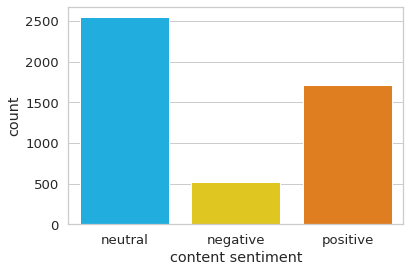

In [14]:
def plot_sentiment(x):
  class_names = ['neutral','negative', 'positive']
  ax = sns.countplot(x)
  plt.xlabel('content sentiment')
  ax.set_xticklabels(class_names)
  plt.show()
plot_sentiment(df_sentiment.sentiment)

---
# Applicazione dell' algoritmo RoBERTa
---

In [15]:
iperparams={}
iperparams["RANDOM_SEED"] = 42
iperparams["epoche"]=10
iperparams["batch_size"]=16
iperparams["numworker"]=2

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    if is_tf_available():
        import tensorflow as tf
        tf.random.set_seed(seed)
set_seed(iperparams["RANDOM_SEED"])

## Da questo grafico è possibile stabilire il valore di max_length
### Si può notare come difficilmente viene superato il valore di 75, ma noi per sicurezza utilizzeremo max_length=100.

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
787 | INFO | NumExpr defaulting to 2 threads.


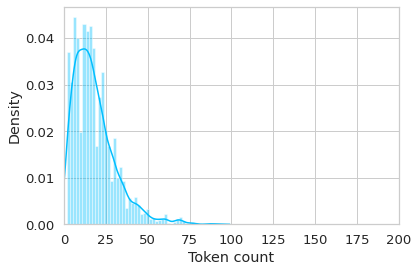

In [16]:
# model_name = "bert-base-uncased"
model_name="roberta-base"
max_length = 100

# tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)
tokenizer = RobertaTokenizerFast.from_pretrained(model_name, do_lower_case=True)

def plot_token_occ(x):
  token_lens = []
  for txt in x:
    txt=str(txt)
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

  sns.distplot(token_lens)
  plt.xlim([0, 200]);
  plt.xlabel('Token count');

plot_token_occ(df_sentiment['desc_video'].tolist())

## Costruzione del train_set e del valid_set

In [17]:
target_names =['neutral','negative','positive']
def crea_data_train_valid(dfx,dfy):
    df=pd.DataFrame(columns=('content','sentiment'))
    df['sentiment']=dfy
    df['content']=dfx
    print(df.shape)
    df_train, df_test = train_test_split(
      df,
      test_size=0.2,
      random_state=iperparams["RANDOM_SEED"]
    )
    train_texts=df_train['content'].tolist()
    valid_texts=df_test['content'].tolist()
    train_labels=df_train['sentiment'].tolist()
    valid_labels=df_test['sentiment'].tolist()
    target_names =['neutral','negative','positive']
    print(len(train_texts),len(valid_texts),len(train_labels),len(valid_labels))
    return train_texts,valid_texts,train_labels,valid_labels

train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment['desc_video'],df_sentiment['sentiment'])

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

(4783, 2)
3826 957 3826 957


In [18]:
# Il codice seguente avvolge i nostri dati di testo tokenizzati in un torch.Dataset:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

## Applichiamo il modello

In [19]:
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")

# inserisco le metriche da visualizzare
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  acc = accuracy_score(labels, preds)
  report = classification_report(labels, preds,target_names=['neutral','negative','positive'])
  return {'accuracy': acc,
          'report': report}

# Il codice seguente usa la TrainingArgumentsclasse per specificare i nostri argomenti di training,

def crea_trainer(model,results_dir,logs_dir,path_name):
    training_args = TrainingArguments(
        output_dir=path_name+'/results'+results_dir,         
        num_train_epochs=iperparams['epoche'],   
        per_device_train_batch_size=iperparams['batch_size'],  # batch size per device durante il training
        per_device_eval_batch_size=iperparams['batch_size'],   # batch size per l'evaluation
        warmup_steps=500,                # numero di warmup steps per il learning rate scheduler
        weight_decay=0.01,               # strength of weight decay
        logging_dir=path_name+'/logs'+logs_dir,   
        logging_steps=200,               # reggistra&salva  i weights ogni x logging_steps
        evaluation_strategy="steps",     # valutare ogni `logging_steps`
    )

    trainer = Trainer(
        model=model,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
    return trainer,training_args

def load_model(model_path, model):
    if model_path==None:
        return
    model.load_state_dict(torch.load(model_path+"/pytorch_model.bin"))
    return model

def save_model(model,tokenizer,model_path):
    model.save_pretrained(model_path)
    tokenizer.save_pretrained(model_path)

def verifica_esistenza_modello(file_name):
    esiste=False
    try:
        my_file = Path(file_name)
        if my_file.is_dir():
          esiste=True
    except IOError:
        print("File not accessible")
    print("Il modello addestrato esiste?",esiste)
    return esiste


path_name='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis'
trainer,training_args=crea_trainer(model,'/results','/logs',path_name)

model_path = path_name+"/modello/roberta-base-sentiment_text"
verifica=verifica_esistenza_modello(model_path)

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Il modello addestrato esiste? True


## Train model

In [20]:
# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

## Valutazione del modello

In [21]:
# evaluate the current model after training
if verifica==True:
    model_load= RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_1_model=trainer.evaluate()

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_v

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.99      0.99      0.99       521
    negative       0.97      0.93      0.95       105
    positive       0.97      0.99      0.98       331

    accuracy                           0.98       957
   macro avg       0.98      0.97      0.97       957
weighted avg       0.98      0.98      0.98       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


---
# Sentiment analisys sfruttando le emoji
---
## Prendiamo il sentiment delle emoji 

### Valutiamo ogni frase assegnadogli un valore pari alla media del sentiment delle emoji che sono contenute in essa.

### Il tutto viene attualizzato attraverso l'utilizzo della libreria emosent.

In [22]:
def emoji_sentiment(text):
    return get_emoji_sentiment_rank(text)["sentiment_score"]

def calcola_sentiment_emoji(list_emoji):
  result=[]
  compound=[]
  for lis in list_emoji:
    sent=0
    for l in lis[0].split():
      try:
        sent+=emoji_sentiment(l)
      except:
        sent+=0
    if len(lis[0].split())>0:
      result_=sent/ len(lis[0].split())
    else:
      result_=sent

    compound.append(result_)
    if result_>=0.33: 
      result_=2
    if result_<=-0.33:
      result_=1
    if result_<0.33 and result_>-0.33:
      result_=0
    result.append(result_)
  return result,compound
result,compound=calcola_sentiment_emoji(df_sentiment['Emoji'].tolist())
df_sentiment['compound_emoji']=compound
df_sentiment['sentiment_emoji']=result
df_sentiment[:1]

,title,keywords,User_description,canonicalHref,Userid,uniqueId,nickname,avatarLarger,signature,createTime,verified,secUid,privateAccount,followerCount,followingCount,heartCount,videoCount,Videoid,desc_video,createTimeVideo,video,author,music,stats,effectStickers,Emoji,positive,negative,neutral,compound,sentiment,compound_emoji,sentiment_emoji
0,BTS (@bts_official_bighit) Official TikTok | W...,"BTS, bts_official_bighit, TikTok, tick tok, ti...",BTS (@bts_official_bighit) on TikTok | 702.5M ...,https://www.tiktok.com/@bts_official_bighit,6737188750352401410,bts_official_bighit,BTS,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,This is Official TikTok for BTS.\nThis is BTS'...,1568624114,True,MS4wLjABAAAAdQQR2OVvFuAzws-JQyiVyn2ACMMkGvB6jV...,False,42500000,0,702500000,49,7007564729979800833,coldplayxbt myunivers ring planet come soon..,1631575809,"{'id': '7007564729979800833', 'height': 1024, ...","{'id': '6737188750352401410', 'shortId': '0', ...","{'id': '7007073788295415809', 'title': 'My Uni...","{'diggCount': 5600000, 'shareCount': 281300, '...",[],[🪐 ],0.0,0.0,1.0,0.0,0,0.0,0


In [23]:
info_sentiment='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Info_sentiment/emoji_text_sentiment.csv'
carica_info=salva_carica_sentiment(info_sentiment,df_sentiment['compound_emoji'])
carica_info

Il file esiste? True


,compound_emoji
0,0.000000
1,0.410500
2,0.611667
3,0.412000
4,0.000000
...,...
4778,0.000000
4779,0.090000
4780,0.000000
4781,0.000000


### Visualizzazione grafica delle occorrenze del sentiment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


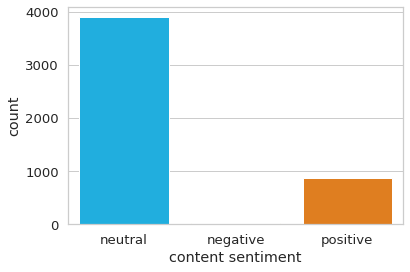

In [24]:
plot_sentiment(df_sentiment.sentiment_emoji)

---
# Applicazione dell' algoritmo ROBERTa
---

## Costruzione del train_set e del valid_set

In [25]:
train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment['desc_video'],df_sentiment['sentiment_emoji'])

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

(4783, 2)
3826 957 3826 957


## Applichiamo il modello

In [26]:
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")

trainer,training_args=crea_trainer(model,'/results_emoji','/logs_emoji',path_name)
model_path = path_name+"/modello/roberta-base-sentiment_emoji"
verifica=verifica_esistenza_modello(model_path)

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_v

Il modello addestrato esiste? True


# Train model


In [27]:
# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

## Valutazione del modello

In [28]:
# evaluate the current model after training
if verifica==True:
    model_load= RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_2_model=trainer.evaluate()

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_v

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.98      0.98      0.98       766
    negative       0.60      0.60      0.60         5
    positive       0.92      0.92      0.92       186

    accuracy                           0.97       957
   macro avg       0.83      0.83      0.83       957
weighted avg       0.97      0.97      0.97       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


---
# Proviamo a effettuare le stesse procedure andando ad evitare la fase di feature Transform testuale
---
## Inizialmete operiamo andando a considerare come sentiment quello calcolato sul testo utilizzando nltk.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


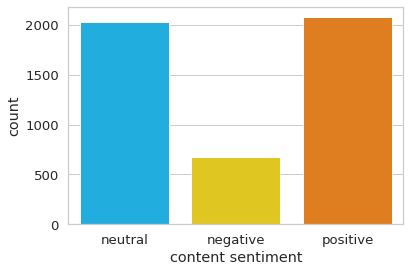

In [29]:
file='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Dataset/tiktok1000_modificato_emoji.csv'
df_mod_emoji=pd.read_csv(file)
df_mod_emoji=df_mod_emoji.drop(df_mod_emoji.columns[0],axis = 1)
df_mod_emoji['Emoji']=emoji

def transform_DS_(ds):
    New_Testo = []
    for i in range(len(ds)):
        frase = str(ds[i])
        word_tokens = nltk.word_tokenize(frase);
        document = ' '.join(word_tokens)
        New_Testo.append(document)
    return New_Testo

ds_transform = transform_DS_(df_mod_emoji['desc_video'].tolist())
df_mod_emoji['desc_video']=ds_transform

df_sentiment_new=calcola_sentiment(df_mod_emoji,False)

plot_sentiment(df_sentiment_new.sentiment)

In [30]:
info_sentiment='/content/drive/MyDrive/Mattia_Gatto_216649_TikTok_text_post_analysis/Info_sentiment/text_sentiment.csv'
carica_info=salva_carica_sentiment(info_sentiment,df_sentiment_new['compound'])
carica_info

Il file esiste? True


,compound
0,0.0000
1,-0.4588
2,0.7845
3,0.3612
4,0.0000
...,...
4778,0.7506
4779,0.6705
4780,0.4939
4781,0.0000


loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta-base/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730
loading file https://huggingface.co/roberta-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/roberta-base/resolve/main/special_tokens_map.json from cache at None
loading file https://huggin

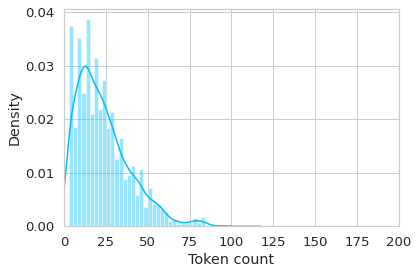

In [31]:
model_name="roberta-base"
max_length = 100

tokenizer = RobertaTokenizerFast.from_pretrained(model_name, do_lower_case=True)

plot_token_occ(df_sentiment_new['desc_video'].tolist())

In [32]:
train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment_new['desc_video'],df_sentiment_new['sentiment'])

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

(4783, 2)
3826 957 3826 957


### Applichiamo il modello

In [33]:
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")

trainer,training_args=crea_trainer(model,'/results_new','/logs_new',path_name)
model_path = path_name+"/modello/roberta-base-sentiment_new"
verifica=verifica_esistenza_modello(model_path)

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_v

Il modello addestrato esiste? True


### train model


In [34]:
# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

### valutazione del modello

In [35]:
# evaluate the current model after training
if verifica==True:
    model_load= RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_3_model=trainer.evaluate()

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_v

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.96      0.99      0.98       423
    negative       0.95      0.89      0.92       144
    positive       0.97      0.96      0.97       390

    accuracy                           0.96       957
   macro avg       0.96      0.95      0.95       957
weighted avg       0.96      0.96      0.96       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


## Proviamo a effettuare la stessa procedura andando ad evitare la fase di applicazione dei trasformers al testo ed utilizzando come label il sentiment calcolato sull'emoji attraverso la libreria emosent.

In [36]:
result,compound=calcola_sentiment_emoji(df_mod_emoji['Emoji'].tolist())
df_sentiment_new['sentiment_emoji']=result
# plot_sentiment(df_sentiment_new.sentiment_emoji)

In [37]:
model_name="roberta-base"
max_length = 100
tokenizer = RobertaTokenizerFast.from_pretrained(model_name, do_lower_case=True)
train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment_new['desc_video'],df_sentiment_new['sentiment_emoji'])

loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta-base/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730
loading file https://huggingface.co/roberta-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/roberta-base/resolve/main/special_tokens_map.json from cache at None
loading file https://huggin

(4783, 2)
3826 957 3826 957


In [38]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

### Applichiamo il modello

In [39]:
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
trainer,training_args=crea_trainer(model,'/results_new_emoji','/logs_new_emoji',path_name)
model_path = path_name+"/modello/roberta-base-sentiment_new_emoji"
verifica=verifica_esistenza_modello(model_path)

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_v

Il modello addestrato esiste? True


### train model


In [40]:
# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

### valutazione del modello

In [41]:
# evaluate the current model after training
if verifica==True:
    model_load= RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_4_model=trainer.evaluate()

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_v

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.98      0.99      0.98       766
    negative       0.75      0.60      0.67         5
    positive       0.95      0.91      0.93       186

    accuracy                           0.97       957
   macro avg       0.89      0.83      0.86       957
weighted avg       0.97      0.97      0.97       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


---
# Valutazioni finali sui 4 modelli addestrati sfruttando l'algoritmo RoBERTa
---

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


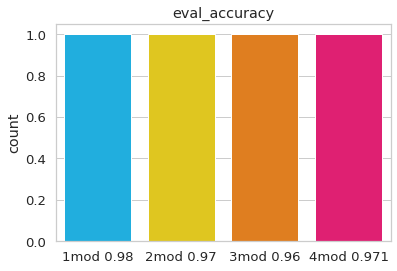

In [42]:
def plot_result(metric):
  x=[round(result_1_model[metric],2),round(result_2_model[metric],2),round(result_3_model[metric],2),round(result_4_model[metric],3)]
  class_names = ['1mod '+str(x[0]),'2mod '+str(x[1]), '3mod '+str(x[2]),'4mod '+str(x[3])]
  ax = sns.countplot(x)
  plt.title(metric)
  ax.set_xticklabels(class_names)
  plt.show()
plot_result('eval_accuracy')

def stampa_ris(modelli):
    print('\n--------------------------------------------------------------\n')
    num=0
    for x in modelli:
      print('Risultati classification Report modello',num)
      print()
      for i in x['eval_report'].split('/n'):
        print(i)
      num+=1
      print('\n--------------------------------------------------------------\n')
      
ris_modelli=[result_1_model,result_2_model,result_3_model,result_4_model]
# stampa_ris(ris_modelli)

## Confronti dei classification report tra i modelli con e senza traformazioni testuali sfruttando RoBERTa .

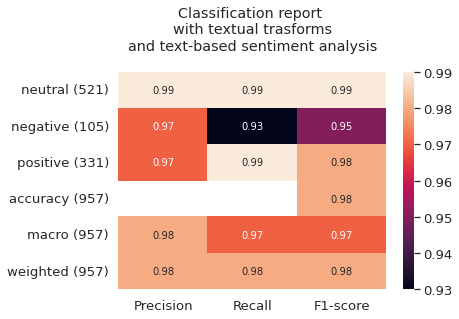

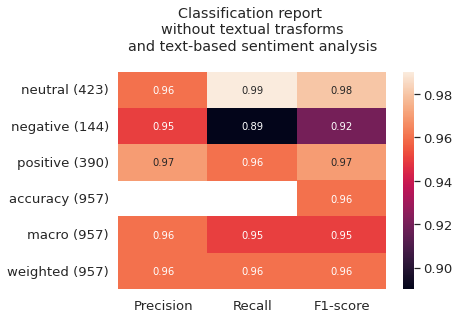

In [43]:
def plot_classification_report(classification_report, title='', cmap='RdBu'):
    title_='Classification report '+title
    plt.title(title_)
    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) )]:
        t = line.strip().split()
        if len(t) < 2: continue
        if t[1]=='avg':
          classes.append(t[0]+t[1])
          start=2
        else:
          classes.append(t[0])
          start=1
        if t[0]== 'accuracy':
          v=[float(),float(),float(t[1])]
        else:
          v = [float(x) for x in t[start: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        # print(v)
        plotMat.append(v)

    # print('plotMat: {0}'.format(plotMat))
    # print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    data=pd.DataFrame(np.array(plotMat))
    data[0][3]=None
    data[1][3]=None
    sns.heatmap(data, annot=True,xticklabels=xticklabels,yticklabels=yticklabels)
    plt.show()

plot_classification_report(result_1_model['eval_report'],title='\nwith textual trasforms\nand text-based sentiment analysis\n')
plot_classification_report(result_3_model['eval_report'],title='\nwithout textual trasforms\nand text-based sentiment analysis\n')

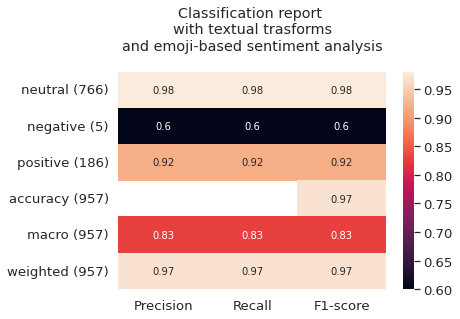

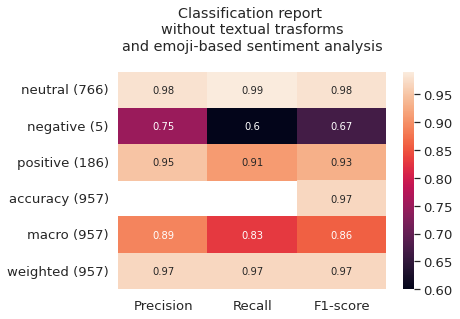

In [44]:
plot_classification_report(result_2_model['eval_report'],title='\nwith textual trasforms\nand emoji-based sentiment analysis\n')
plot_classification_report(result_4_model['eval_report'],title='\nwithout textual trasforms\nand emoji-based sentiment analysis\n')

---
# Ulteriori Valutazioni
---
## Confronti dei classification report tra i modelli con e senza traformazioni testuali sfruttando BERT .

### Bert classification sul dataset processato, con label il sentiment del text.

In [45]:
model_name = "bert-base-uncased"
max_length = 100

tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment['desc_video'],df_sentiment['sentiment'])

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

model= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")

trainer,training_args=crea_trainer(model,'/results_bert','/logs_bert',path_name)

model_path = path_name+"/modello/bert-base-sentiment_text"
verifica=verifica_esistenza_modello(model_path)

# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

# evaluate the current model after training
if verifica==True:
    model_load= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_1_model_bert=trainer.evaluate()

https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpbvttndvk


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp_v06iuqb


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
creating metadata file for /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpe5i27nbu


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
creating metadata file for /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range":

(4783, 2)
3826 957 3826 957


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_vocab_size":

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
creating metadata file for /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', '

Il modello addestrato esiste? True


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_vocab_size":

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.97      0.99      0.98       521
    negative       0.95      0.90      0.93       105
    positive       0.98      0.97      0.97       331

    accuracy                           0.97       957
   macro avg       0.97      0.95      0.96       957
weighted avg       0.97      0.97      0.97       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


### Bert classification sul dataset processato, con label il sentiment delle emoji.

In [46]:
model_name = "bert-base-uncased"
max_length = 100

tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment['desc_video'],df_sentiment['sentiment_emoji'])

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

model= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")

trainer,training_args=crea_trainer(model,'/results_bert_emoji','/logs_bert_emoji',path_name)

model_path = path_name+"/modello/bert-base-sentiment_emoji"
verifica=verifica_esistenza_modello(model_path)

# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

# evaluate the current model after training
if verifica==True:
    model_load= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_2_model_bert=trainer.evaluate()

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

(4783, 2)
3826 957 3826 957


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_vocab_size":

Il modello addestrato esiste? True


loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceCla

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.97      0.99      0.98       766
    negative       1.00      0.60      0.75         5
    positive       0.95      0.90      0.93       186

    accuracy                           0.97       957
   macro avg       0.98      0.83      0.89       957
weighted avg       0.97      0.97      0.97       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


### Bert classification sul dataset senza processamento sul text, con label il sentiment del text.

In [47]:
model_name = "bert-base-uncased"
# model_name="roberta-base"
max_length = 100

tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment_new['desc_video'],df_sentiment_new['sentiment'])
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

model= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")

trainer,training_args=crea_trainer(model,'/results_bert_without_transf','/logs_bert_without_transf',path_name)

model_path = path_name+"/modello/bert-base-sentiment_text_without_transform"
verifica=verifica_esistenza_modello(model_path)

# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

# evaluate the current model after training
if verifica==True:
    model_load= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_3_model_bert=trainer.evaluate()

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

(4783, 2)
3826 957 3826 957


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_vocab_size":

Il modello addestrato esiste? True


loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceCla

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.95      0.97      0.96       423
    negative       0.89      0.85      0.87       144
    positive       0.94      0.94      0.94       390

    accuracy                           0.94       957
   macro avg       0.93      0.92      0.93       957
weighted avg       0.94      0.94      0.94       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


### Bert classification sul dataset senza processamento sul text, con label il sentiment delle emoji.

In [48]:
model_name = "bert-base-uncased"
# model_name="roberta-base"
max_length = 100

tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

train_texts,valid_texts,train_labels,valid_labels=crea_data_train_valid(df_sentiment_new['desc_video'],df_sentiment_new['sentiment_emoji'])
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

model= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")

trainer,training_args=crea_trainer(model,'/results_bert_without_transf_emoji','/logs_bert_without_transf_emoji',path_name)

model_path = path_name+"/modello/bert-base-sentiment_emoji_without_transform"
verifica=verifica_esistenza_modello(model_path)

# train the model
if verifica==False:
    trainer.train()
    save_model(model,tokenizer,model_path)

# evaluate the current model after training
if verifica==True:
    model_load= BertForSequenceClassification.from_pretrained(model_name, num_labels=len(target_names))#.to("cuda")
    model_load=load_model(model_path, model_load)
    trainer = Trainer(
        model=model_load,                         
        args=training_args,                  # training arguments
        train_dataset=train_dataset,         # training dataset
        eval_dataset=valid_dataset,          # evaluation dataset
        compute_metrics=compute_metrics,     
    )
result_4_model_bert=trainer.evaluate()

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

(4783, 2)
3826 957 3826 957


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.3",
  "type_vocab_size":

Il modello addestrato esiste? True


loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceCla

Trainer is attempting to log a value of "              precision    recall  f1-score   support

     neutral       0.98      0.99      0.98       766
    negative       0.60      0.60      0.60         5
    positive       0.96      0.92      0.94       186

    accuracy                           0.97       957
   macro avg       0.85      0.84      0.84       957
weighted avg       0.97      0.97      0.97       957
" of type <class 'str'> for key "eval/report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


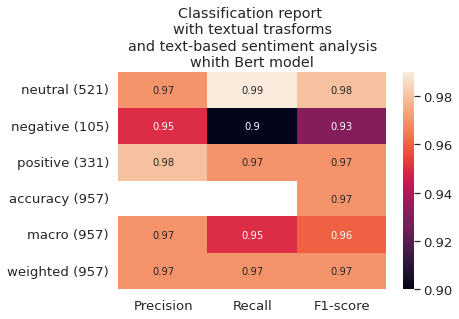

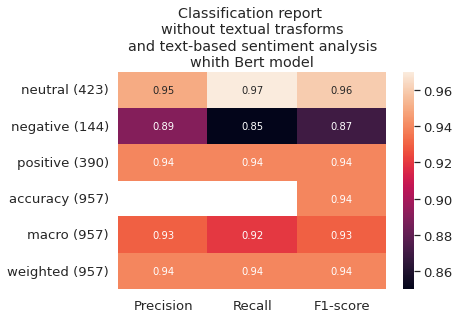

In [49]:
plot_classification_report(result_1_model_bert['eval_report'],title='\nwith textual trasforms\nand text-based sentiment analysis\nwhith Bert model')
plot_classification_report(result_3_model_bert['eval_report'],title='\nwithout textual trasforms\nand text-based sentiment analysis\nwhith Bert model')

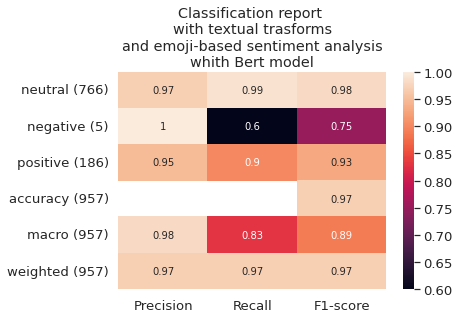

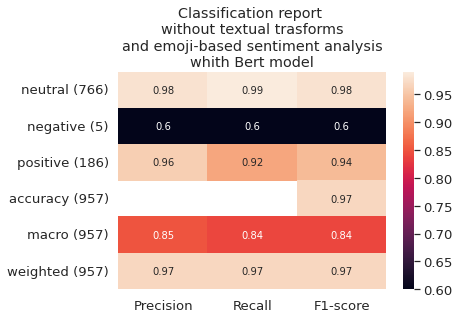

In [50]:
plot_classification_report(result_2_model_bert['eval_report'],title='\nwith textual trasforms\nand emoji-based sentiment analysis\nwhith Bert model')
plot_classification_report(result_4_model_bert['eval_report'],title='\nwithout textual trasforms\nand emoji-based sentiment analysis\nwhith Bert model')